100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


<Figure size 864x864 with 0 Axes>

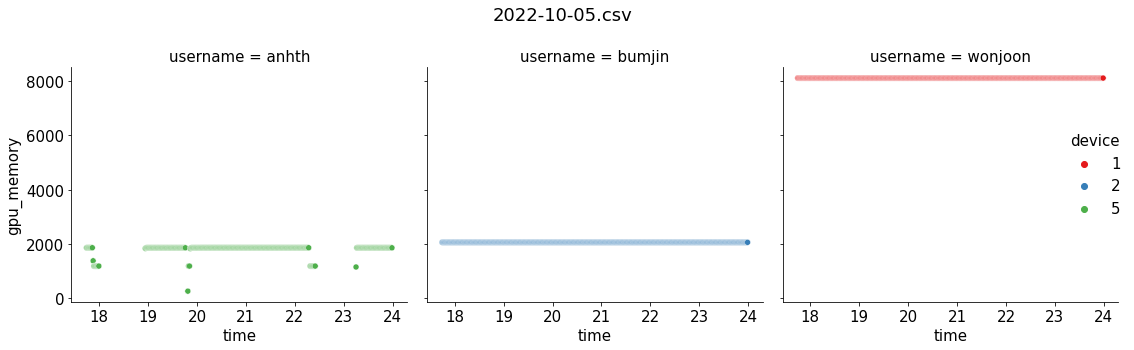

<Figure size 864x864 with 0 Axes>

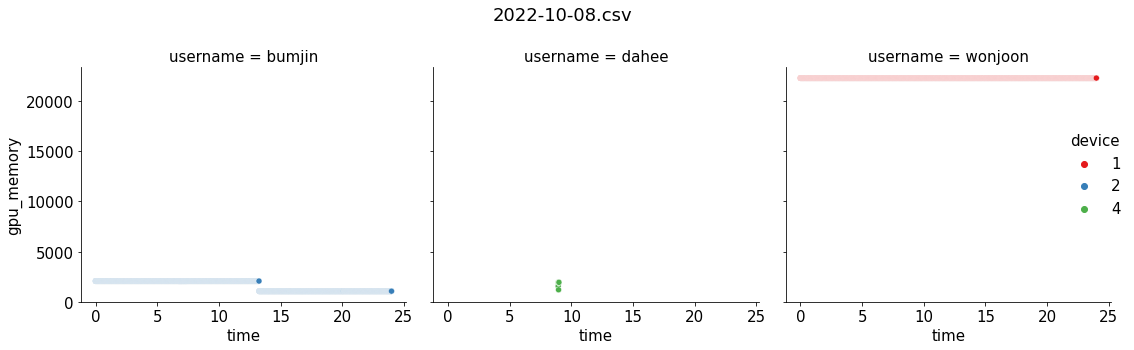

<Figure size 864x864 with 0 Axes>

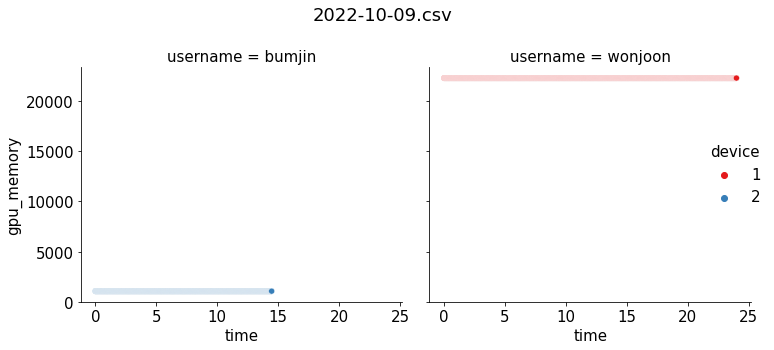

<Figure size 864x864 with 0 Axes>

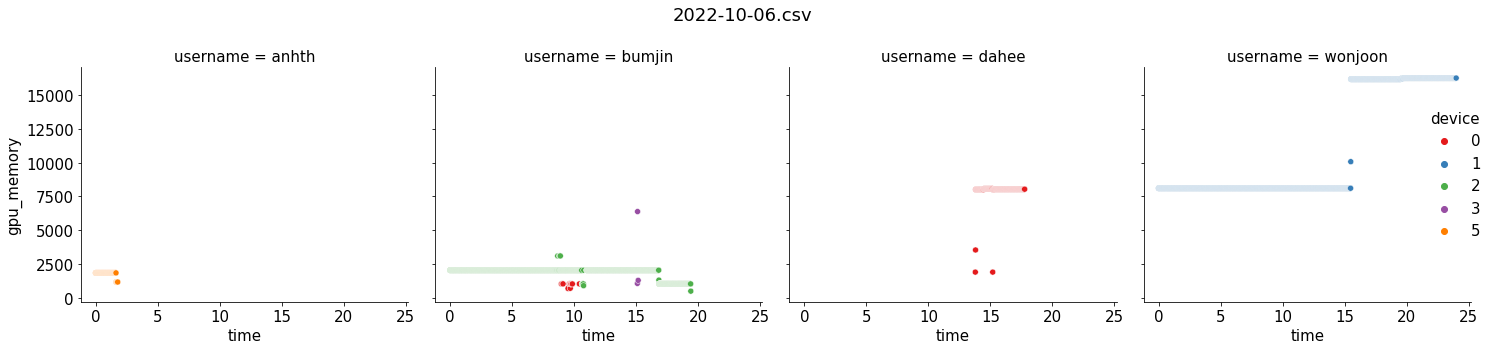

<Figure size 864x864 with 0 Axes>

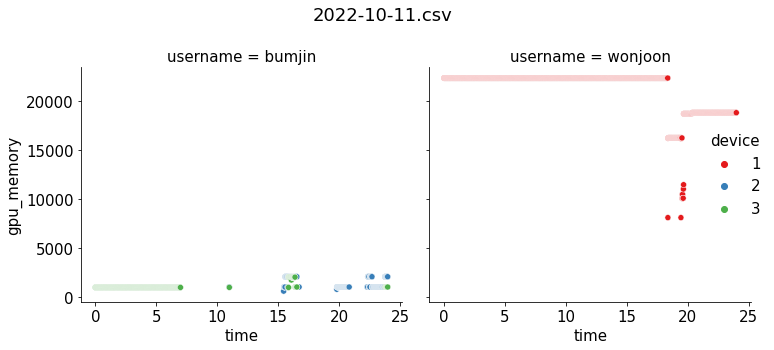

<Figure size 864x864 with 0 Axes>

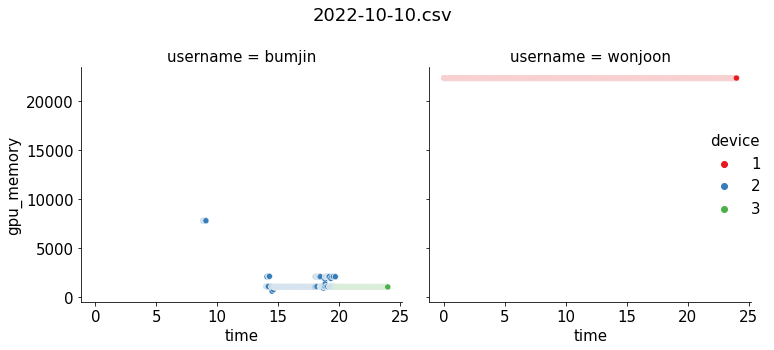

<Figure size 864x864 with 0 Axes>

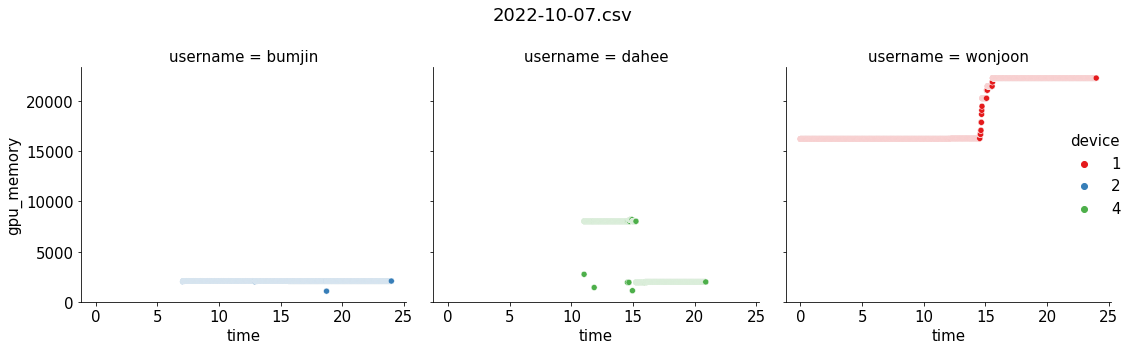

<Figure size 864x864 with 0 Axes>

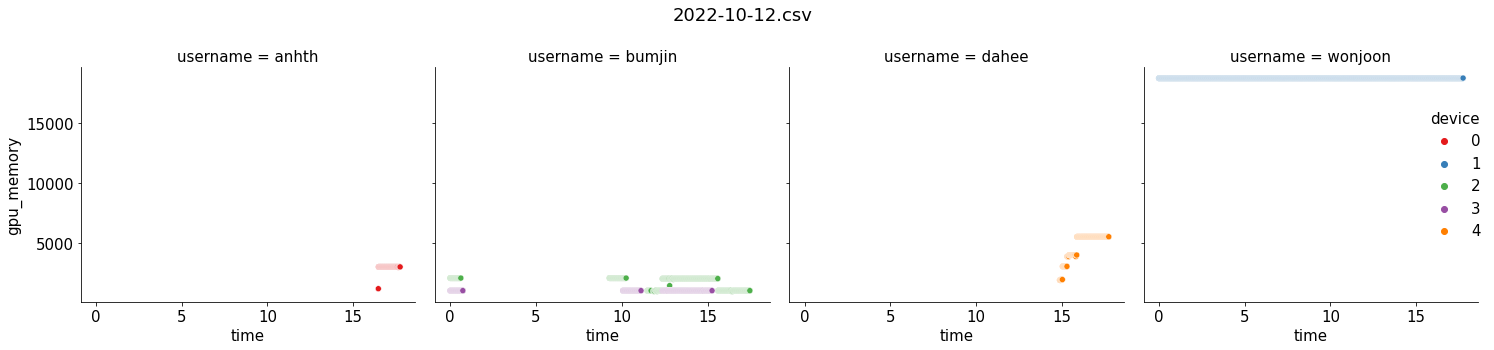

In [30]:
import pandas as pd 
import re 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
import os 
from tqdm import tqdm  
sns.set_style("whitegrid")


matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['font.size'] = 15

def time_to_second(t):
    h,m,s = t.split(":")
    return (int(h)*3600 + int(m)*60 + int(s))/3600

if not os.path.exists("results"):
    os.mkdir("results")

dfs = []
for f in tqdm(os.listdir("gpu_monitoring")):
    
    f_name = os.path.join('gpu_monitoring', f)
    file_date = f.split(".")[0]
    df = pd.read_csv(f_name)
    dfs.append(df)
    df['gpu_memory'] = df['gpu_memory'].apply(lambda x : int(re.findall(r'\d+', x)[0]))
    df['time'] = df['time'].apply(lambda x : time_to_second(x))
    df_g = df[['username', 'device', 'time', 'gpu_memory', 'gpu_memory_percent']].groupby(['username', 'device', 'time']).sum().reset_index()

    fig = plt.figure(figsize=(12,12), facecolor='white')
    sns.relplot(x='time',y='gpu_memory', hue='device', col='username', data=df_g, palette='Set1', kind='scatter')
    plt.suptitle(f)
    plt.tight_layout()
    plt.savefig(f"results/{file_date}.png")


num_unique_days = len(os.listdir("gpu_monitoring"))

df = pd.concat(dfs)
df_g = df[['username', 'device', 'time', 'gpu_memory', 'gpu_memory_percent', 'date']].groupby(['username', 'device', 'time']).mean().reset_index()  #  GPUs/Hour
plt.figure(figsize=(12,12), facecolor='white')
sns.relplot(x='time',y='gpu_memory_percent', hue='device', col='username', data=df_g, palette='Set2', kind='scatter', lw=2, alpha=0.7)
plt.savefig(f"results/full.png")

temp = df[['username', 'gpu_memory_percent']].groupby("username").mean()
temp.to_csv("results/full.csv")

          gpu_memory_percent
username                    
anhth               8.202000
bumjin              4.253549
dahee              18.747003
wonjoon            41.535749


<Figure size 864x864 with 0 Axes>

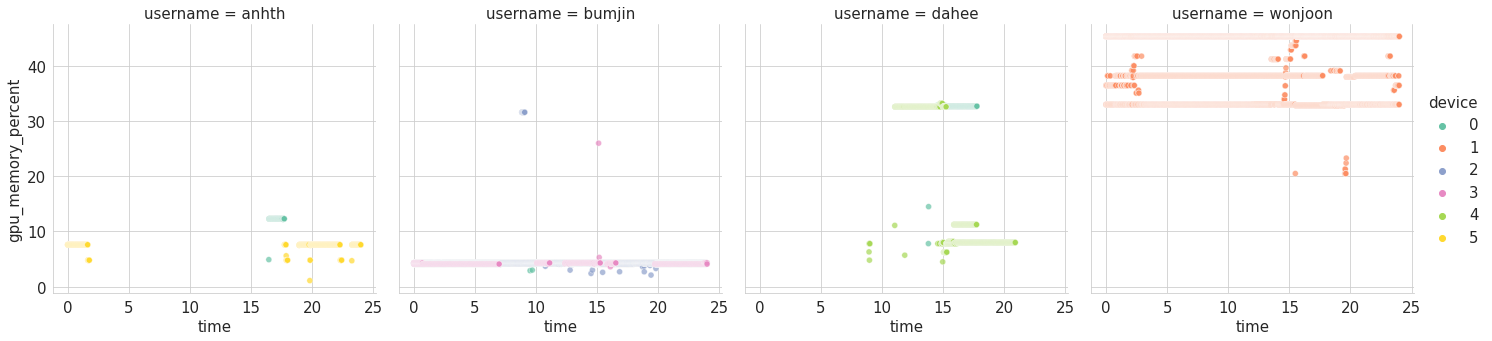